In [1]:
# Import all the necessary Libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from csv import reader as rd
from math import pi
from sklearn.preprocessing import LabelEncoder
from math import exp
from random import randrange
import numpy as np
from math import sqrt

In [2]:
#Read CSV dataset
df = pd.read_csv('hayes-roth.csv')

In [3]:
df.head(20)

,92,2,1,1.1,2.1,1.2
0,10,2,1,3,2,2
1,83,3,1,4,1,3
2,61,2,4,2,2,3
3,107,1,1,3,4,3
4,113,1,1,3,2,2
5,80,3,1,3,2,2
6,125,3,4,2,4,3
7,36,2,2,1,1,1
8,105,3,2,1,1,1
9,81,1,2,1,1,1


In [4]:
df.columns=['A','B','C','D','E','Y']

In [5]:
df.describe()


,A,B,C,D,E,Y
count,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000
mean,66.305344,2.000000,1.961832,1.961832,1.954198,1.847328
std,38.330324,0.822753,0.947909,0.947909,0.951619,0.769348
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,33.500000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,66.000000,2.000000,2.000000,2.000000,2.000000,2.000000
75%,99.500000,3.000000,2.000000,2.000000,2.000000,2.000000
max,132.000000,3.000000,4.000000,4.000000,4.000000,3.000000


In [6]:
df.columns

Index(['A', 'B', 'C', 'D', 'E', 'Y'], dtype='object')

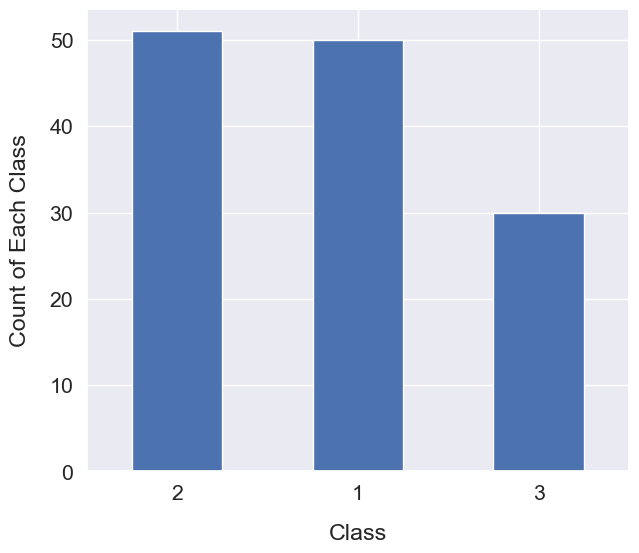

In [7]:
sns.set(font_scale=1.4)
df['Y'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Class", labelpad=14)
plt.ylabel("Count of Each Class", labelpad=14)
plt.title("", y=1.02);

In [8]:
#label_encoder initialisation
le = LabelEncoder()  

In [9]:
#Label Encoding categorical columns and then converting to string
df['A']= le.fit_transform(df['A']).astype(str)
df['B']= le.fit_transform(df['B']).astype(str)
df['C']= le.fit_transform(df['C']).astype(str)
df['D']= le.fit_transform(df['D']).astype(str)
df['E']= le.fit_transform(df['E']).astype(str)
df['Y']= le.fit_transform(df['Y']).astype(str)

In [10]:
#Checking data types
df.dtypes

A    object
B    object
C    object
D    object
E    object
Y    object
dtype: object

In [11]:
#Saving the datframe to a string
df.to_csv('preprocessed_hayes_roth.csv')

In [12]:
# Converting the string data type column to integer type
def data_conv(data, column):
    class_v = [row[column] for row in data]
    uni = set(class_v)
    look = dict()
    for i, value in enumerate(uni):
        look[value] = i
    for row in data:
        row[column] = look[row[column]]
    return look

In [13]:
# Dataset Split into k folds
def ksplit(dataset, n):
    a = list()
    b = list(dataset)
    fol = int(len(dataset) / n)
    for _ in range(n):
        fold = list()
        while len(fold) < fol:
            ix = randrange(len(b))
            fold.append(b.pop(ix))
        a.append(fold)
    return a

In [14]:
# Split the dataset by class values, returns a dictionary
def separate(dataset):
    separated = dict()
    for i in range(len(dataset)):
        vector = dataset[i]
        class_value = vector[-1]
        if (class_value not in separated):
            separated[class_value] = list()
        separated[class_value].append(vector)
    return separated

In [15]:
# Calculate the mean, standard deviation of a list of numbers

def mean(num):
    return sum(num)/(len(num))
 

def stdev(num):
    avg = mean(num)
    try:
        var = int(sum([(x-avg)**2 for x in num])) / (len(num)-1)
    except ZeroDivisionError:
        var=0
    return sqrt(var)
 
def sd(dataset):
    story = [(mean(column), stdev(column), len(column)) for column in zip(*dataset)]
    del(story[-1])
    return story

In [16]:
# Implementing K fold Cross Validation
def algo(data, algorithm, k, *args):
    folds = ksplit(data, k)
    scores = list()
    for fold in folds:
        train_set = list(folds)
        train_set.remove(fold)
        train_set = sum(train_set, [])
        test_set = list()
        for row in fold:
            row_copy = list(row)
            test_set.append(row_copy)
            row_copy[-1] = None
        predicted = algorithm(train_set, test_set, *args)
        actual = [row[-1] for row in fold]
        accuracy = accuracy_metric(actual, predicted)
        scores.append(accuracy)
    return scores

In [17]:
# Split dataset by class then calculate statistics for each row
def s_class(data):
    separated = separate(data)
    st = dict()
    for class_value, rows in separated.items():
        st[class_value] = sd(rows)
    return st

In [18]:
# Calculate the Gaussian probability distribution function for x
def probability(x, m, s):
    try:
        res1 = exp(-(int((x-m)**2) / (2 * s**2 )))
    except ZeroDivisionError:
        res1=0
    try:
        res2=(1 / (sqrt(2 * pi) * s)) * res1
    except ZeroDivisionError:
        res2=0
    return (res2)

In [19]:
# Calculate the probabilities of predicting each class for a given row
import numpy as np
def calculate(op, row):
    total = sum([op[label][0][2] for label in op])
    prob = dict()
    for cv, cs in op.items():
        prob[cv] = op[cv][0][2]/float(total)
        for i in range(len(cs)):
            m, s, _ = cs[i]
            prob[cv] += np.log(probability(row[i], m, s))
    return prob

In [20]:
# Gaussian Naive Bayes Algorithm
def nb(train, test):
    s = s_class(train)
    p = list()
    for x in test:
        res = predictions(s, x)
        p.append(res)
    return(p)

In [21]:
# Predict the class for a given row
def predictions(ss, row):
    pr = calculate(ss, row)
    label, prob = None, -1
    for cv, probability in pr.items():
        if probability > prob or label is None:
            prob = probability
            label = cv
    return label

In [22]:
# Loading the CSV file
def load(filename):
    da = list()
    with open(filename, 'r') as file:
        re = rd(file)
        for r in re:
            if not r:
                continue
            da.append(r)
    return da

In [23]:
#Accuracy Percentage Calculation
def accuracy_metric(act, pred):
    cor = 0
    for i in range(len(act)):
        if act[i] == pred[i]:
            cor += 1
    return cor / (len(act)) * 100.0

In [24]:
# Pipeline Naive Bayes
k = 10
name= 'preprocessed_hayes_roth.csv'
dataset = load(name)
for i in range(len(dataset[0])-1):
    data_conv(dataset, i)
data_conv(dataset, len(dataset[0])-1)
res = algo(dataset, nb, k)


/var/folders/3m/lm4crwzd05925wnqr9f3qtfw0000gn/T/ipykernel_9699/3351882173.py:10: RuntimeWarning: divide by zero encountered in log
  prob[cv] += np.log(probability(row[i], m, s))


In [25]:
c=1
print(f"We have perfomed 10 Fold Cross Validation on the given data using our Gaussian Naive Bayes Model. The result for each fold is as follows:")
print(f"")
for i in res:
    print(f' %f' % i)
print(f"")


We have perfomed 10 Fold Cross Validation on the given data using our Gaussian Naive Bayes Model. The result for each fold is as follows:

 69.230769
 61.538462
 84.615385
 53.846154
 76.923077
 53.846154
 69.230769
 76.923077
 61.538462
 53.846154



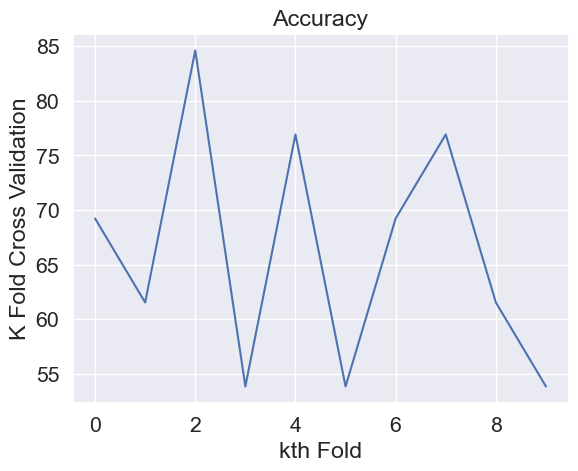

In [26]:
c=[1,2,3,4,5,6,7,8,9,10]
plt.plot(res,)
plt.title('Accuracy')
plt.xlabel('kth Fold')
plt.ylabel('K Fold Cross Validation')
plt.show()

In [27]:
print(f'Hence we can conclude by taking average of all these values that our model is accurate %.3f%%' % (sum(res)/float(len(res))))

Hence we can conclude by taking average of all these values that our model is accurate 66.154%
